# Compare Germany data sources: JHU and RKI

See [this earlier post](compare-rki-and-jhu-data.html) for an introduction. Here we continue the comparison with some additional plots.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import oscovida as ov

ov.display_binder_link("2020-compare-germany-data-sources.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-compare-germany-data-sources.ipynb)

## Get data from Johns Hopkins University (JHU)

In [2]:
cases_jhu, deaths_jhu = ov.get_country_data("Germany")

## Get data from Robert-Koch Institute (RKI)


In [3]:
germany = ov.fetch_data_germany()

In [4]:
# We use 'Meldedatum' as this is expected to be closest to the JHU data
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()


# Overview plot Germany with RKI data

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3750ea35e0>,
       dtype=object),
 date
 2020-01-03         1
 2020-01-28         3
 2020-01-29         5
 2020-01-31        11
 2020-02-03        12
                ...  
 2020-11-08    681652
 2020-11-09    697370
 2020-11-10    716440
 2020-11-11    737260
 2020-11-12    750804
 Name: AnzahlFall, Length: 274, dtype: int64,
 date
 2020-01-03        0
 2020-01-28        0
 2020-01-29        0
 2020-01-31        0
 2020-02-03        0
               ...  
 2020-11-08    12088
 2020-11-09    12126
 2020-11-10    12157
 2020-11-11    12183
 2020-11-12    12194
 Name: AnzahlTodesfall, Length: 274, dtype: int64)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


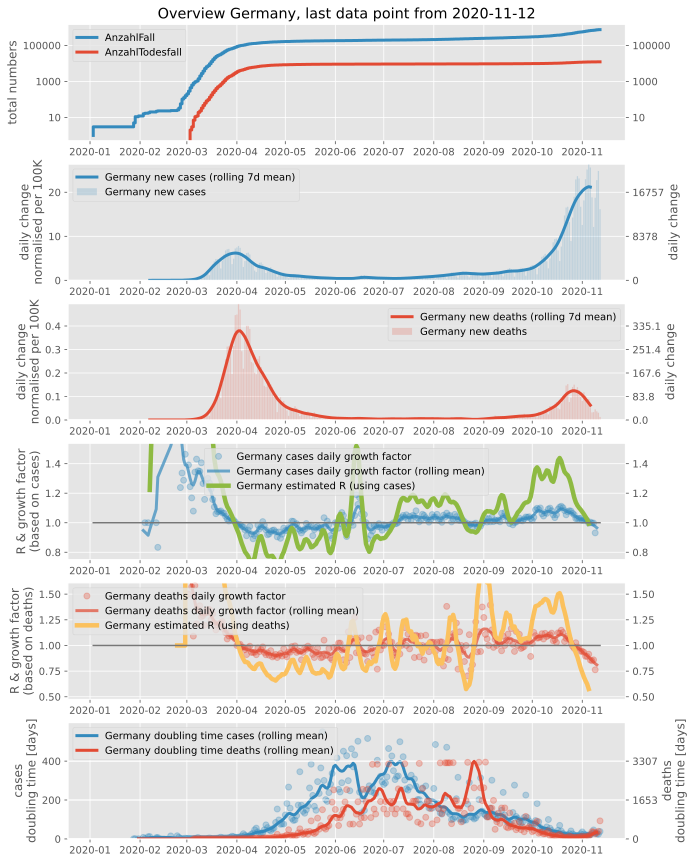

In [5]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki));

## Overview plot Germany with JHU data

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f373f3b04f0>,
       dtype=object),
 2020-01-22         0
 2020-01-23         0
 2020-01-24         0
 2020-01-25         0
 2020-01-26         0
                ...  
 2020-11-08    682624
 2020-11-09    689146
 2020-11-10    715693
 2020-11-11    738094
 2020-11-12    762832
 Freq: D, Name: Germany cases, Length: 296, dtype: object,
 2020-01-22        0
 2020-01-23        0
 2020-01-24        0
 2020-01-25        0
 2020-01-26        0
               ...  
 2020-11-08    11372
 2020-11-09    11408
 2020-11-10    11781
 2020-11-11    11994
 2020-11-12    12216
 Freq: D, Name: Germany deaths, Length: 296, dtype: object)

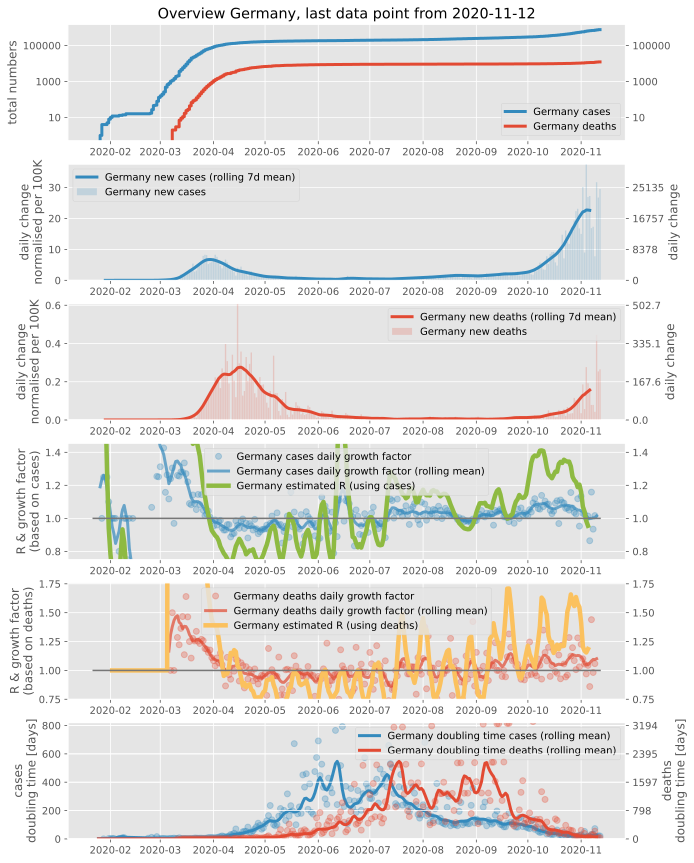

In [6]:
ov.overview(country="Germany");

## More detailed comparison of cases and deaths

(0.0, 33054.0)

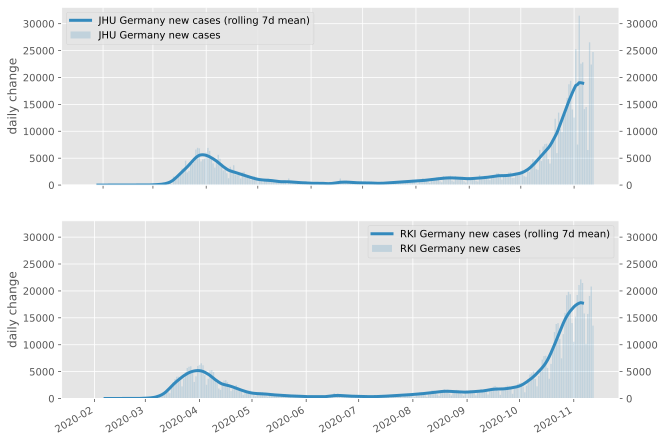

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu, color="C1", labels=["JHU Germany", "cases"])
ax = axes[1]
ov.plot_daily_change(ax, cases_rki, color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

(-58.05, 537.05)

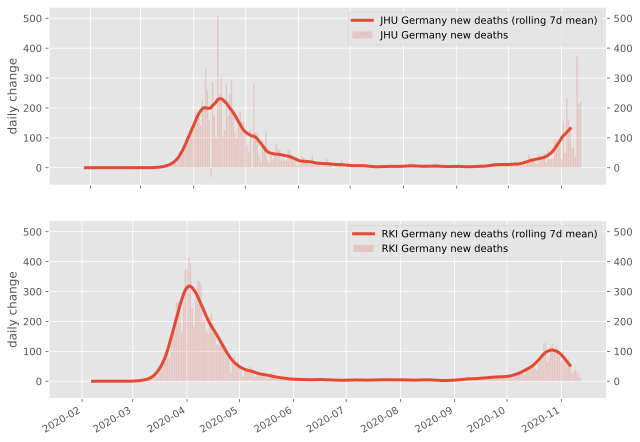

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, deaths_jhu, color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki, color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

## Discussion

The JHU and RKI data provided for Germany show some differences, including:

- the JHU data is noisier in comparison to the smoother RKI data
- the amount of deaths in the last week is overestimated in the JHU data or underestimated in the RKI

Both phenomena can be explained with the hypothesis that the RKI data is updated retrospectively to introduce corrections: if a death that has been occured 3 days ago is registered with the RKI, it will update the data set and add that death to the date 3 days ago. In contrast, we hypothesize that the JHU data appears to try to be as accurate as possible, but not retrospectively change dates in the past but rather add corrective numbers to the last data point (sometimes even negative deaths if required to compensate for inaccurate data). 

The more regular data from the RKI is thus explainable by the retrospective improvement of the data: as more and more numbers appear at the RKI (even from weeks in the past), the data set becomes increasingly more accurate. 

The underestimation of deaths and cases from RKI could also be explained: as reported cases and deaths may only arrive at the RKI days after their occurance, the numbers that are reported today for yesterday are likely to be too small. There is a danger that this is misleading.



To emphasive the delay in the numbers being reported, we look at a particular data set up to 13 November 2020 as an example:

(0.0, 391.65)

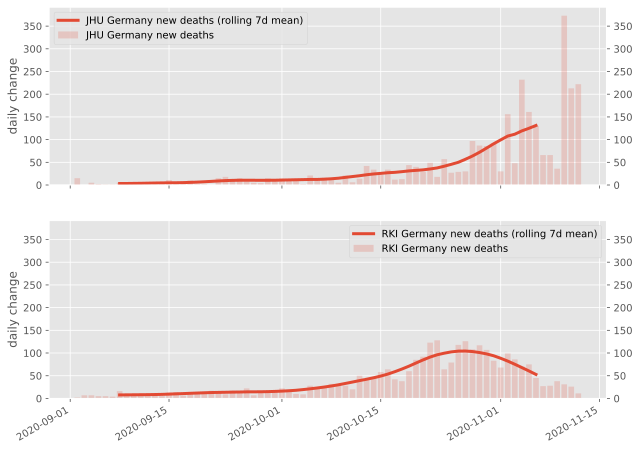

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
startdate = "2020-09-01"
enddate = "2020-11-13"
ov.plot_daily_change(ax, deaths_jhu[startdate:enddate], color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki[startdate:enddate], color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

The deviation in the reported deaths in the last 2 weeks is quite significant.

(0.0, 33054.0)

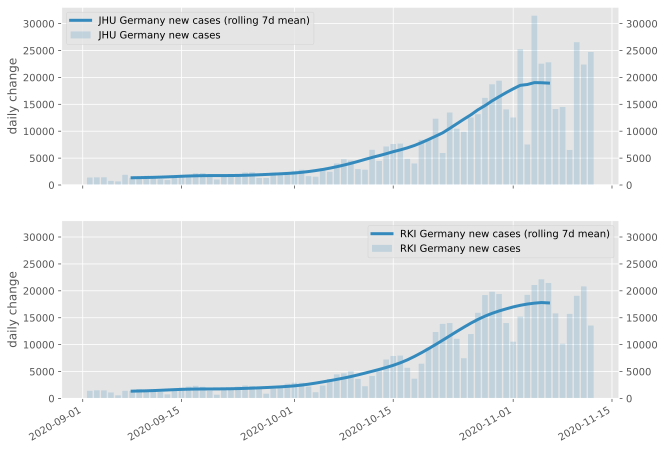

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu[startdate:enddate], color="C1", labels=["JHU Germany", "cases"])
ax = axes[1]
ov.plot_daily_change(ax, cases_rki[startdate:enddate], color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

The reported cases between JHU and RKI are fairly comparable; although looking at the rolling average the JHU estimates the numbers in the last 2 weeks a bit higher than RKI.